In [59]:
import os
from google.colab import userdata
url_video = userdata.get('URL_YOUTUBE_VIDEO')
groq_api_key = userdata.get('GROQ_API_KEY')
google_api_key = userdata.get('GOOGLE_API_KEY')

In [1]:
%pip install pytubefix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.0/732.0 kB 16.9 MB/s eta 0:00:00


In [4]:
from pytubefix import YouTube

yt = YouTube(url_video)
video = yt.streams.get_lowest_resolution()
video.download(output_path="./mp4", filename="test.mp4")
print("Descarga completada.")

Descarga completada.


In [5]:
# Define the Video Path
video_path = "./mp4/test.mp4"

In [7]:
# Install libraries for audio processing and  handling multimedia files
%pip install -q pydub
!apt-get install -q ffmpeg

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [8]:
import subprocess
from pydub import AudioSegment

In [9]:
# Define the audio path
audio_output_path = "mp3/output.mp3"

In [11]:
# Ensure the output directory exists
output_dir = os.path.dirname(audio_output_path)
# Create the directory if it does not already exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [12]:
# Ensure the output file has the correct extension
if not audio_output_path.endswith(".mp3"):
    audio_output_path += ".mp3"

In [13]:
# Construct the ffmpeg command to extract the audio
command = [
    'ffmpeg',
    '-y', # overwrites if the audio exists
    '-i', video_path, # input file
    '-vn', # No video
    '-acodec', 'libmp3lame', # Audio codecs
    audio_output_path # output file
]

In [14]:
# execute the command to extract the audio
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', './mp4/test.mp4', '-vn', '-acodec', 'libmp3lame', 'mp3/output.mp3'], returncode=0)

In [15]:
# Set the bitrate
bitrate = "32k"

In [16]:
# Set path for compressed audio
compressed_audio_path = "mp3/compressed.mp3"

In [17]:
# Construct the ffmpeg command to compress the audio
command = [
    'ffmpeg',
    '-y',                    # Overwrite output file if it exists
    '-i', audio_output_path, # Input audio file path
    '-ab', bitrate,          # Audio bitrate for compression
    compressed_audio_path    # Output compressed audio file path
]

# Execute the ffmpeg command to compress the audio
subprocess.run(command, check=True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'mp3/output.mp3', '-ab', '32k', 'mp3/compressed.mp3'], returncode=0)

In [18]:
# Import OpenAI library
from openai import OpenAI

In [21]:
# Connect to the OpenAI API
groq_client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=groq_api_key
)

In [22]:
# Open the compressed audio file in binary mode
with open(compressed_audio_path, "rb") as file:
    # Use the Whisper model to transcribe the audio
    transcript = groq_client.audio.transcriptions.create(
        model="whisper-large-v3-turbo",    # Specify the model to use for transcription
        file=file             # Provide the audio file for transcription
    )

In [23]:
# Inspect the transcript
transcript.text

' Hola a todo el profesorado que está al otro lado de la pantalla. Muchas gracias de antemano por vuestra atención. Soy Elisa García y os voy a presentar el trabajo que he realizado para el proyecto final de ciclo. Antes de explicar en qué consiste mi aplicación, quiero contaros por qué surgió la idea que me ha llevado a desarrollarla. Os presento estas dos imágenes. Si nos acercamos a la primera, visualmente os puede transmitir muchas cosas. Todo dependerá de los ojos que la observan. En mi caso me transmite fantasía, tranquilidad, pero otra persona puede sentir miedo, soledad, tristeza. ¿Pero qué sucede si le añadimos un recurso musical? El contexto cambia, nos transmite otras sensaciones y nos sumerge en la historia que hay detrás de la imagen. Aventura, riesgo, lucha... Pues lo mismo sucede con los juegos de mesa. Suena algo estático que nosotros le damos un contexto. En la imagen se ven copas de vino para jugar a un juego de investigación y esa recreación ambiental también se cons

In [24]:
# Define the path where the transcription will be saved
transcript_path = "txt/transcript.txt"

In [25]:
# Ensure the output directory exists
output_dir = os.path.dirname(transcript_path)
# Create the directory if it does not already exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [26]:
# Save the transcribed text to a file
with open(transcript_path, "w") as file:
  file.write(transcript.text) # .text is the attribute from transcrition

In [28]:
%pip install moviepy

In [30]:
from moviepy.editor import VideoFileClip


  if event.key is 'enter':



In [31]:
# Define the output folder for storing frames
output_folder = "imgs/frames"
# Create the folder if it does not already exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [32]:
# Load the video
video = VideoFileClip(video_path)

In [33]:
# Extract frames from the video at regular intervals
frame_paths = []
interval = 10  # Time interval between frames in seconds

for t in range(0, int(video.duration), interval):
    # Construct the file path for each frame
    frame_path = os.path.join(output_folder, f"frame_{t:04d}.png")

    # Save the frame at the specified time
    video.save_frame(frame_path, t)

    # Append the path of the saved frame to the list
    frame_paths.append(frame_path)

In [34]:
# Import libraries
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import torch
import numpy as np

In [35]:
# Load the Model, Processor and Tokenizer
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [36]:
# Read the transcribed text from the file
with open(transcript_path, "r") as file:
  transcript_text = file.read()

In [37]:
# Tokenize the entire transcript text
tokens = tokenizer(transcript_text,
                   return_tensors="pt",  # Return tensors for PyTorch
                   padding=True)         # Pad sequences to the same length

# Extract the input_ids from the tokenized output
tokens = tokens['input_ids'][0]

# Print the number of tokens
print(f"The number of tokens is {len(tokens)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (3894 > 77). Running this sequence through the model will result in indexing errors


The number of tokens is 3894


In [39]:
# The CLIP model requires 77 tokens per chunk
max_tokens = 77
transcription_chunks = []

# Split the tokens into chunks of up to max_tokens tokens each
for i in range(0, len(tokens), max_tokens):
    chunk = tokens[i:i+max_tokens]
    transcription_chunks.append(chunk)

# Print the number of chunks created
print(f"The number of chunks is {len(transcription_chunks)}")

The number of chunks is 51


In [40]:
# Text Embeddings -> embed the tokens in each chunk
text_embeddings = []

for chunk in transcription_chunks:
  # Ensure the chunk is in the correct shape for the model
  inputs = {"input_ids": chunk.unsqueeze(0)}

  # Get the text embedding for the chunk
  with torch.no_grad():
    text_embedding = model.get_text_features(**inputs)
    # Convert the embedding to a numpy array and flatten it
    text_embeddings.append(text_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to a numpy array
text_embedding_np = np.array(text_embeddings)

# Print the shape of the text embeddings array
print(f"Text embedding shape is {text_embedding_np.shape}")

Text embedding shape is (51, 512)


In [41]:
# Import the PIL library
from PIL import Image

In [42]:
# Embed the images
frames_folder = "imgs/frames"
image_embeddings = []
image_paths = []

for frame_file in os.listdir(frames_folder):
  if frame_file.endswith('.png'):
    # Construct the path to the image file
    frame_path = os.path.join(frames_folder, frame_file)
    image_paths.append(frame_path)

    # Load and preprocess the image
    image = Image.open(frame_path)
    inputs = processor(images = image, return_tensors = "pt")

    # Generate the image embeddings
    with torch.no_grad():
      image_embedding = model.get_image_features(**inputs)
      # Convert the embedding to a numpy array and flatten it
      image_embeddings.append(image_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to a numpy array
image_embedding_np = np.array(image_embeddings)

# Print the shape
print(f"Image embedding shape is {image_embedding_np.shape}")

Image embedding shape is (94, 512)


In [43]:
# Import Libraries
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

In [44]:
# Calculate the cosine similarity matrix between text and image embeddings
similarities = cosine_similarity(text_embedding_np,
                                 image_embedding_np)

# Print the cosine similarity matrix
similarities

array([[0.15319136, 0.15259334, 0.15853393, ..., 0.16515023, 0.1641698 ,
        0.19655043],
       [0.18339942, 0.14701363, 0.13715318, ..., 0.15612128, 0.1422307 ,
        0.12852538],
       [0.14309683, 0.09155086, 0.10324775, ..., 0.09553684, 0.10515353,
        0.13368756],
       ...,
       [0.21369568, 0.2043229 , 0.12863833, ..., 0.20433342, 0.18351829,
        0.16180804],
       [0.2067512 , 0.17137802, 0.17474376, ..., 0.17890365, 0.18349227,
        0.1346772 ],
       [0.21204326, 0.1839834 , 0.21176457, ..., 0.14964901, 0.13892113,
        0.19342555]], dtype=float32)

In [45]:
print(f"The shape of the similarities is {similarities.shape}")

The shape of the similarities is (51, 94)


In [46]:
# Retrieve the top-k most similar images for each text chunk
top_k = 5
for i, text_chunk in enumerate(similarities):
  # Get indices of the top-k most similar images
  similar_indices = text_chunk.argsort()[-top_k:][::-1]
  print(f"Top {top_k} images for each chunk {i}: {similar_indices}")

Top 5 images for each chunk 0: [ 4 27 87 62 35]
Top 5 images for each chunk 1: [14 85  5 36 59]
Top 5 images for each chunk 2: [36 79  4 15 35]
Top 5 images for each chunk 3: [76 74 58 66 29]
Top 5 images for each chunk 4: [36 14 16 73 85]
Top 5 images for each chunk 5: [36 77 60 38 22]
Top 5 images for each chunk 6: [47 60 34 77 61]
Top 5 images for each chunk 7: [14 85 36 73  5]
Top 5 images for each chunk 8: [61 82 32 63 71]
Top 5 images for each chunk 9: [14 85  5 76 30]
Top 5 images for each chunk 10: [14 50 85 46  5]
Top 5 images for each chunk 11: [50 46 85 16 14]
Top 5 images for each chunk 12: [14 73 47 76 34]
Top 5 images for each chunk 13: [36 14  5 85  0]
Top 5 images for each chunk 14: [85 14 36 73  5]
Top 5 images for each chunk 15: [50 36 46 42  0]
Top 5 images for each chunk 16: [11 59 61 44 77]
Top 5 images for each chunk 17: [36  4 79 27 15]
Top 5 images for each chunk 18: [14 73  4 60 85]
Top 5 images for each chunk 19: [36 73 16 15 14]
Top 5 images for each chunk 20

In [47]:
# Set a random seed for reproducibility
random.seed(1502)

# Select 5 random text chunk indices
random_text_indices = random.sample(range(len(text_embedding_np)), 5)
print(f"Random text chunk indices: {random_text_indices}")

Random text chunk indices: [10, 33, 38, 30, 16]


In [48]:
# Find the 3 most similar images for each randomly selected text chunk
text_to_images_similarities = []
for idx in random_text_indices:
  # Get indices of the top 3 most similar images for the text chunk
  similar_images = similarities[idx].argsort()[-3:][::-1]
  text_to_images_similarities.append(similar_images)


  The text chunk 1: se man tiene y cae a la par que cre ce wee , pero sigue por enci ma por eso consider o import ante , al men os dur ante la e ta pa te cn ol ó g ica actual , tener con oci mi en tos de android en esta dia positi va quiero mo str ar os el flu jo de dat os de la ap lic ación la ap lic ación con sta


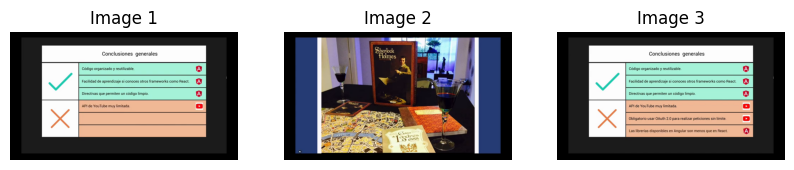


  The text chunk 2: nuestro cas o , la p á gina principal es sear cher y la p á gina sec un daria es user . en la ap lic ación , el usu ario se lo gue a a trav és de google y se ha inser tado el lo gue o en el comp on ente azure . como pod é is ver , el comp on ente est á su sc rito a un serv icio de


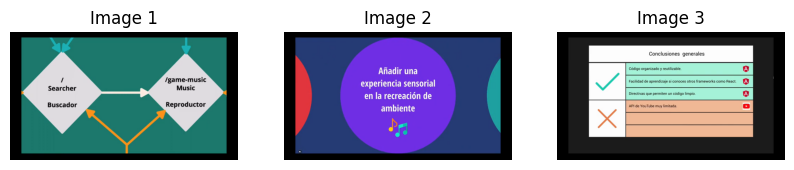


  The text chunk 3: ú squ eda en youtube , que ser á el segun do serv icio . por ej em plo , al hac er una b ú squ eda del ju ego concordia ob ten emo s una raya de ob je tos con las categor í as que pod é is ver . no todas ser án ade cu adas , por lo que en la ap lic ación tam bi é n se han desc art


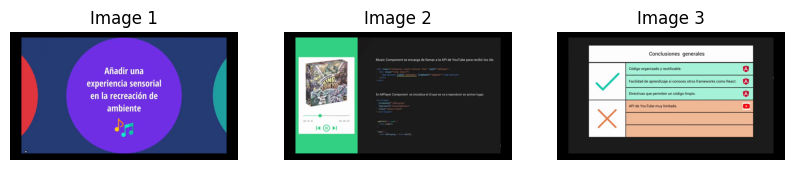


  The text chunk 4: dene . en segun do lu gar , cuando el input reci be el fo co , se llama su fun ción a un fo co . esta fun ción se tea una pro pied ad inter na a truth y or dena al arro ba output con su pro pied ad en if de que av ise al padre del campo , en vi á nd ole la variable se tea . cuando se produce el


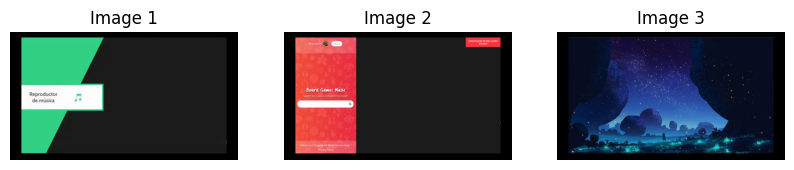


  The text chunk 5: gue ados , nos va a dar el av iso de que por favor nos lo gue emo s h ace mos cli c en login y nos lo gue amos con google como ve is ap are ce nuestro usu ario y ya po demos in ici ar la b ú squ eda que nos lle var á a la si gui ente p á gina este es el re produc tor como pod é is


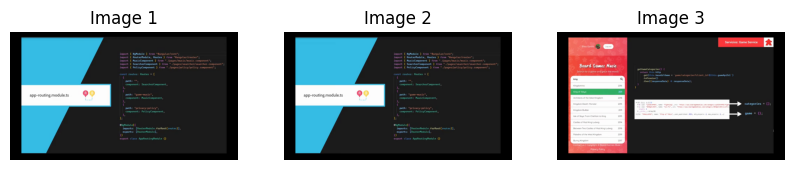

In [49]:
# Data visualization of the text and images
for i, text_index in enumerate(random_text_indices):
  plt.figure(figsize = (10,8))

   # Displaying the text chunk
  print(f"""
  The text chunk {i + 1}: {' '.join([tokenizer.decode([token]) for token in transcription_chunks[text_index]]
  )}""")

  # Displaying similar images corresponding to the current text chunk
  for j, image_idx in enumerate(text_to_images_similarities[i]):
    image = Image.open(image_paths[image_idx])
    plt.subplot(1, 3, j + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {j + 1}")

  plt.show() # Show the plot with images and text

In [82]:
# Let's define a query
query = "¿Cómo se llama la persona que habla?"

In [83]:
# Tokenizing the query
query_tokens = tokenizer(query,
                         return_tensors = "pt",       # Return tensors in PyTorch format
                         padding = True)['input_ids'] # Pad tokens to ensure consistent length

In [84]:
# Generate the query embeddings in the joint embedding space
# Use the CLIP model to compute text features
with torch.no_grad():
  query_embedding = model.get_text_features(
      input_ids = query_tokens  # Pass tokenized query to model
  ).cpu().numpy().flatten()     # Convert to numpy array and flatten to 1D

# Print shape of the embedding
print(f"The shape of the query embedding is {query_embedding.shape}")

The shape of the query embedding is (512,)


In [85]:
# Compute the cosine similarity between the query and the transcripts
text_similarities = cosine_similarity([query_embedding], text_embedding_np)[0]

In [86]:
# Define how many chunks we want
top_k_texts = 10

# Retrieve the indices of the top-k most similar text_chunks
top_k_text_indices = text_similarities.argsort()[-top_k_texts:][::-1]
top_k_text_indices

array([50, 30,  0, 29, 31, 28, 41, 15,  1, 38])

In [87]:
# Retrieve the closest images for each text chunk
top_k_images_indices = []
images_per_chunk = 2 # Number of top similar images to retrieve for each text chunk

for idx in top_k_text_indices:
  # Find indices of the top-k similar images for the current text chunk
  similar_images = similarities[idx].argsort()[-images_per_chunk:][::-1]
  top_k_images_indices.append(similar_images)  # Add to the list

# Remove any duplicates and limit to the top k images
top_k_images_indices = list(set([item for sublist in top_k_images_indices for item in sublist]))

# Print the number of unique image indices
print(f"The total images indices are {len(top_k_images_indices)}")

The total images indices are 8


In [88]:
import base64

In [89]:
# Combining the retrieved text chunks
retrieved_text = []

for idx in top_k_text_indices:
  # Decode and append each text chunk using the tokenizer
  retrieved_text.append(tokenizer.decode(transcription_chunks[idx]))

# Join all the text chunks into a single string
retrieved_text = ' '.join(retrieved_text)
retrieved_text

'rollo de la aplicación . y daros las gracias por vuestra atención durante estos minutos . ha sido un placer y espero que os haya gustado . gracias . <|endoftext|> dene . en segundo lugar , cuando el input recibe el foco , se llama su función a un foco . esta función setea una propiedad interna a truth y ordena al arroba output con su propiedad en if de que avise al padre del campo , enviándole la variable setea . cuando se produce el <|startoftext|>hola a todo el profesorado que está al otro lado de la pantalla . muchas gracias de antemano por vuestra atención . soy elisa garcía y os voy a presentar el trabajo que he realizado para el proyecto final de ciclo . antes de explicar en qué consiste mi aplicación , efecto te ves en pantalla . ¿ cómo enviar el hijo información a su padre ? vamos a ir paso a paso . primero , veamos el objeto arroba output en el hijo que manda el mensaje . este será el encargado de enviar el aviso al padre cuando se le or aviso , el padre recoge en una función

In [90]:
# Convert the images and append them
base64frames = []

for idx in top_k_images_indices:
  image_path = image_paths[idx]  # Get the path of the image

  # Open the image file in binary read mode
  with open(image_path, "rb") as image_file:
    # Encode the image file content to base64 and decode to UTF-8 string
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')
    base64frames.append(base64_image) # Append the encoded image string to the list

base64frames

['iVBORw0KGgoAAAANSUhEUgAAAoAAAAFoCAIAAABIUN0GAABTeklEQVR4nO3deZBk13Ue+O/c+14ulbVXN7rRaOwCQAACCBAkJHGxSEkjihotsDSyZMVII2okBkfbhGJsKEyFHTYdDtuhMQlpQrbHYQ21kKaHIwoUJVEUQIoggGbvS3WjgW6g0d3ofauqrsrK9b17z/xxM7Oyq3qpAiqrMqu/X3QUElkvX75c6p137nIuQEREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREtIbIah8AEa0cke76k1fV1T4E6mELv8+99Y1aqb/GxTxPL71vdBNp/xtf6l93OEEs/qTwNgLkwp1fZye9G4DDlivwfnZUp09y3fVqu89Sw7OIdDSiR53b9RUYXGmtWGoMQIfDQLfFmA5pf5k3yUumZddt35xlDsDhxWn7/wvgAdP8xQ1fvl/eIyJaCtP8+iqMCd/aK/5oW3F3MX/JqrqkP3hVDU+6yOiuqvO2bB3ztXTbCWjx1kYG3F1Hc/PptgbqTmXAIqJWYQEBDGCbMfiaD4BAAMRecaNtid65VMLPCACi2FirAlWNSy6ZrQIQkYWn75U5oS/yWa51Num2qHMdS71A6dCeia4qXEN3Lmwv83d0XgYc95vv/9ynAaSmdv0HGmO8AM0EWBdxXKKL3ZJoIfEGAHysquLFOTeQIo7j6tbDL7744tj5inPOOddtl8wtrQBjjPG+0XDUtUf7zrW/3kU+pPW2EAWL//IEFy9e7L0+4NYlg6qOjo5iEQFYRBiAacWIiHgjIpHJAzBqRGQghYicio/WZmYymYL33jk374FdEuFCNDLGtOd54Wi75AiX18LXe8MEd02+D/QOdVu7SGcHYUXQHWM1AGIqwNU71Vr3RAoAWQ8AdtF/OyEAC//WaIkSyQCoog6grJH3/gNm6NSpU1uffVYyGV9XL2pCA3UXJ1LtYWapV/e9qP

In [91]:
# Define the model
MODEL = "gemini-2.0-flash"

google_client = OpenAI(
    api_key=google_api_key, # Use the provided API key for authentication
    base_url="https://generativelanguage.googleapis.com/v1beta"
)

# Define the system prompt
system_prompt = """
Eres un profesor experto que resume contenido visual y transcrito"""

In [92]:
# Prepare the user message content
user_message_content = [
    {"type": "text", "text":"Estos son los frames del vídeo"},                                # Initial message indicating the following content
    *map(lambda x: {"type": "image_url",                                  # Map each base64-encoded image to the appropriate format
                    "image_url": {"url": f'data:image/jpg;base64,{x}',
                                 "detail": "low"}},
         base64frames),
    {"type": "text",                                                      # Append the retrieved text as a separate message
     "text": retrieved_text}
]

In [93]:
# Call the OpenAI API to generate a summary
response = google_client.chat.completions.create(
    model = MODEL, # Specify the model to use for the completion
    messages = [
        {"role": "system", "content": system_prompt}, # Provide system prompt to guide the model
        {"role": "user", "content": user_message_content}, # Provide user message content with images and text
    ],
    temperature = 0.3,  # Set the temperature to control the randomness of the output
)

In [94]:
# Generate the response
generated_response = response.choices[0].message.content
print(generated_response)

El video trata sobre una aplicación de reproductor de música para juegos de mesa. La aplicación permite a los usuarios buscar juegos y obtener una lista de canciones relacionadas con ese juego. La aplicación también permite a los usuarios crear listas de reproducción y compartirlas con otros usuarios. El video también muestra cómo la aplicación utiliza la API de YouTube para obtener los ID de música. El video también muestra cómo el componente de música se encarga de llamar a la API de YouTube para recibir los ID. El video también muestra cómo el componente MPlayer inicializa el ID que se va a reproducir en primer lugar. El video también muestra cómo enviar información del hijo al padre. El video también muestra cómo al hacer foco en el input, el padre recibe la orden de elevar la caja. El video también muestra las conclusiones generales de la aplicación, como el código organizado y reutilizable, la facilidad de aprendizaje si conoces otros frameworks como React, las directivas que per